In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os
import glob

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
#simnum = 0
ns = int(10000)
rbin = int(13)
rmin, rmax = 3., int(20)
njk = int(10)
filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-*.dat'
filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'

#filelist = os.listdir(filedir)
filelist = glob.glob(filedir+filename)
nsim = len(filelist)
print(nsim)

chis = []

# Read all files
for file in filelist:
    data = ascii.read(file)
    chis.append( data['chi'] )

# Calculate the covariance summation and covariance proper
covsum = np.zeros((rbin,rbin))
chis_mean = np.mean(chis,axis=0)
for i in range(rbin):
    for j in range(rbin):
        for k in range(nsim):
            a = (chis[k][i]-chis_mean[i])
            b = (chis[k][j]-chis_mean[j])
            covsum[i][j] += a*b
# for i in range(rbin):
#     for k in range(nsim):
#         covsum[i]+=(chis[k]-chis_mean)*(chis[k]-chis_mean)
cov = covsum/(nsim-1)


1996


In [7]:

# Calculate chi squared
chisq = np.zeros(nsim)
for i in range(nsim):
    a = np.transpose(np.asarray(chis[i])-chis_mean)
    b = (np.asarray(chis[i])-chis_mean)
    c = np.linalg.inv(cov)
    ac = np.dot(a,c)
    chisq[i] = ( np.dot(ac,b) )


In [8]:
c


array([[ 7.97611624e+05, -6.17656118e+05, -1.10361264e+04,
         2.66107566e+03, -1.09575142e+04,  3.66405764e+04,
         3.90153698e+04, -2.69016960e+04, -5.91226804e+04,
         6.38126260e+04,  2.32566639e+04, -7.31509302e+04,
         3.97042666e+04],
       [-6.17656118e+05,  1.41734218e+06, -7.48665185e+05,
        -1.25450295e+03,  1.70820523e+03, -7.50936126e+04,
        -3.89536349e+03, -4.45319927e+04,  1.01797850e+05,
        -7.12357421e+04, -2.12087544e+04,  7.29689343e+04,
        -2.06718458e+04],
       [-1.10361264e+04, -7.48665185e+05,  1.82456354e+06,
        -8.97444553e+05, -7.61108593e+04,  4.46058581e+04,
        -5.81024609e+04,  1.08530852e+05, -6.09966913e+04,
         3.28120252e+03,  2.82042764e+04, -2.35958312e+04,
        -3.75137700e+03],
       [ 2.66107566e+03, -1.25450295e+03, -8.97444553e+05,
         2.27691010e+06, -1.28041430e+06, -4.07386967e+04,
         4.27502035e+04, -7.90662289e+04,  3.07001101e+04,
         7.07307476e+04, -4.86154219e

### Plot Chi Squared

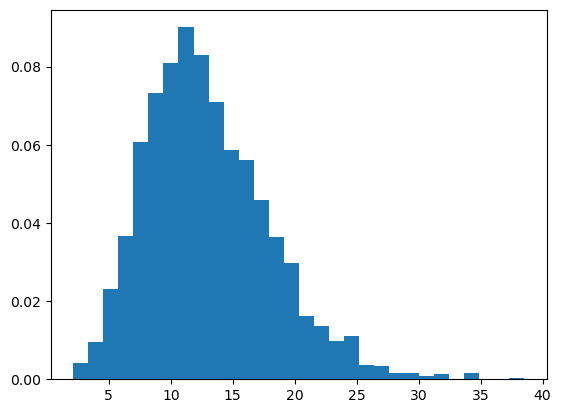

In [9]:

plt.hist(np.asarray(chisq).flatten(),bins=30,color=['C00'],density=True)
#plt.vlines(0.5,0,.6,ls=':',color='k')
plt.show()


### Plot Normalized Covariance

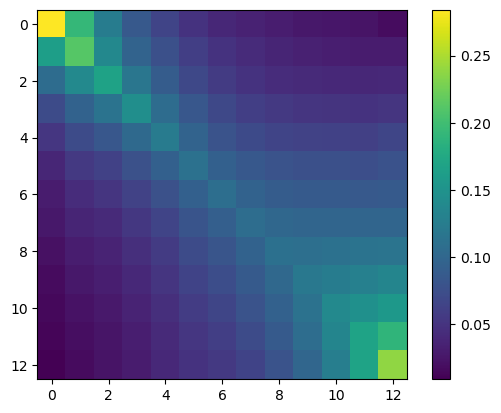

In [10]:
row_sums = cov.sum(axis=1)
new_matrix = cov / row_sums[:, np.newaxis]

plt.imshow(new_matrix)
plt.colorbar()
plt.show()

### Plot VPFs

1996


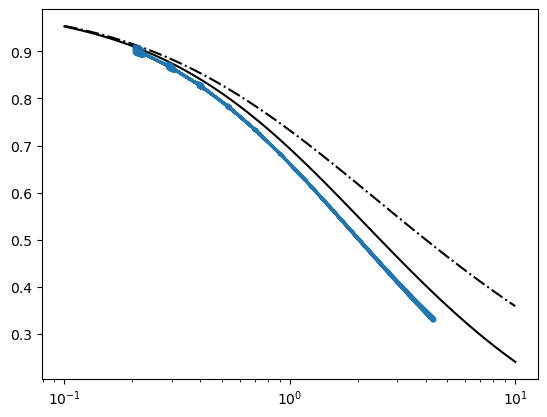

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import glob

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
#simnum = 0
ns = int(10000)
rbin = int(13)
rmin, rmax = 3., int(20)
njk = int(10)
filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-*.dat'
filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'

#filelist = os.listdir(filedir)
filelist = glob.glob(filedir+filename)
nsim = len(filelist)
print(nsim)

x = np.geomspace(1E-1,1E1,50)
c='k'
plt.plot(x,NB(x),label='Negative Binomial',c=c)
plt.plot(x,term(x),label='Thermodynamical',c=c,ls='-.')

# Read all files
for file in filelist:
    plotdata = ascii.read(file)

    nxi = plotdata['N_mean']*plotdata['xi']
    chi = plotdata['chi']
    chi_std = plotdata['chi_std']
    plt.errorbar(nxi,chi,yerr=chi_std,c='C00',alpha=.1)
plt.xscale('log')
#plt.legend(loc=3)
plt.show()
